In [1]:
!pip install transformers -q


In [ ]:
!git lfs install

Git LFS initialized.


In [ ]:
!git clone https://huggingface.co/soumyajit451/news-app

Cloning into 'news-app'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 4
Unpacking objects: 100% (10/10), 3.21 KiB | 1.07 MiB/s, done.


In [2]:
import transformers
from transformers import TrainingArguments, Trainer
from transformers import DataCollatorForSeq2Seq
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
from zipfile import ZipFile

In [ ]:
!rm -rf bart-* tokenizer/

In [ ]:

with ZipFile('news-app/bart-samsum-model.zip', 'r') as zipObj:
    # Extract all the contents of zip file in current directory
    zipObj.extractall()


In [ ]:

with ZipFile('news-app/tokenizer.zip', 'r') as zipObj:
    # Extract all the contents of zip file in current directory
    zipObj.extractall()

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('tokenizer')
model_pegasus = AutoModelForSeq2SeqLM.from_pretrained('bart-samsum-model').to(device)


In [ ]:
a = """
I can’t recall a recent baseball story that has captured the public imagination like the current one involving Los Angeles Dodgers phenom Shohei Ohtani, his former translator Ippei Mizuhara and gambling.

I won’t recite all of the facts here, but the story has a lot going for it that makes it fascinating, including any potential role Ohtani plays in the story besides being taken advantage of – he denies any involvement or knowledge in gambling and says the money was stolen. No officials have accused him of anything untoward.

But this episode is already generating less than ideal headlines with a federal criminal investigation underway, along with Major League Baseball’s own investigation – so we should know more soon about why his now former translator was able to access Ohtani’s bank account and was able to allegedly transfer $4.5 million to pay his bookie.

Beyond whether there is more to this story than what the facts currently suggest, we’re talking about something that has worried me for years: athletes and any connection to gambling. This is especially the case for baseball and its dark history with betting.

Baseball is no longer what it once was in the public discourse; World Series ratings are way down from their peaks and only about 10% of Americans say it is their favorite sport to watch.

That’s part of why this recent story concerns me as a fan of the game.

Mar 25, 2024; Los Angeles, California, USA; A press conference with Los Angeles Dodgers designated hitter Shohei Ohtani and interpreter Will Ireton is broadcast in the Vin Scully press box at Dodger Stadium. Mandatory Credit: Kirby Lee-USA TODAY Sports
Ohtani takes part in a press conference with Dodgers employee Will Ireton. Kirby Lee/USA Today Sports/Reuters
Ohtani is the type of player who transcends the sport and counteracts the downward trend in baseball’s national appeal more than anyone else. He is baseball’s biggest star. He has more Instagram followers (nearly eight million total) than any other player; in fact, it’s not even close with former teammate Mike Trout at a little over two million.

Looking at the public at large, Ohtani is America’s favorite player. His Q Score, a measure of appeal among the broader public, is higher than any other well-known active player.

Among baseball fans, the pattern is similar: those who know the two-time American League MVP are more likely to say he is one of their favorite players than anyone else.

Now, his name is being associated with something very negative – particularly in this sport – even if the superstar himself didn’t have anything to do with it. Baseball doesn’t need this.

That said, assuming Ohtani has done nothing wrong, America’s pastime will emerge from this situation mostly unscathed.

I’ll bet (pun intended) that won’t be the case for some sports leagues down the line, however. The stage has been set for a player or manager to do something very wrong and illegal eventually when it comes to gambling.
"""

In [ ]:
a_tok = tokenizer(a, return_tensors='pt')

In [ ]:
with torch.inference_mode():
    a_out = model_pegasus.generate(**a_tok)

In [ ]:
a_out

tensor([[    2,     0,     0,     0,  3609,   139, 31376,  5534,    90,  1543,
            18,   320, 28894,    38,  3807, 13862, 14688,  2957,  1742,  7225,
            68,   306,     4,   245,   153,     7,   582,    39,  1040,   324,
             4,   345,    16,    10,   752,  1837,   803,     8,  5454,   815,
         10243,    18,   308,   803,    88,     5,   948,     4, 10243,    16,
           117,  1181,     5,   144,  1406,  2414,    11,   730,     4,     2]])

In [ ]:
a_dec=tokenizer.decode(a_out[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)

In [ ]:
a_dec

"Shohei Ohtani's former translator Ippei Mizuhara transferred $4.5 million to pay his bookie. There is a federal criminal investigation and Major League Baseball's own investigation into the matter. Baseball is no longer the most popular sport in America."

In [ ]:
model_pegasus.save_pretrained("final_news")

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


In [ ]:
tokenizer.save_pretrained("final_news")

('final_news/tokenizer_config.json',
 'final_news/special_tokens_map.json',
 'final_news/vocab.json',
 'final_news/merges.txt',
 'final_news/added_tokens.json',
 'final_news/tokenizer.json')

In [ ]:
!ls final_news

config.json		merges.txt	   special_tokens_map.json  tokenizer.json
generation_config.json	model.safetensors  tokenizer_config.json    vocab.json


In [ ]:
!huggingface-cli logout

Successfully logged out.


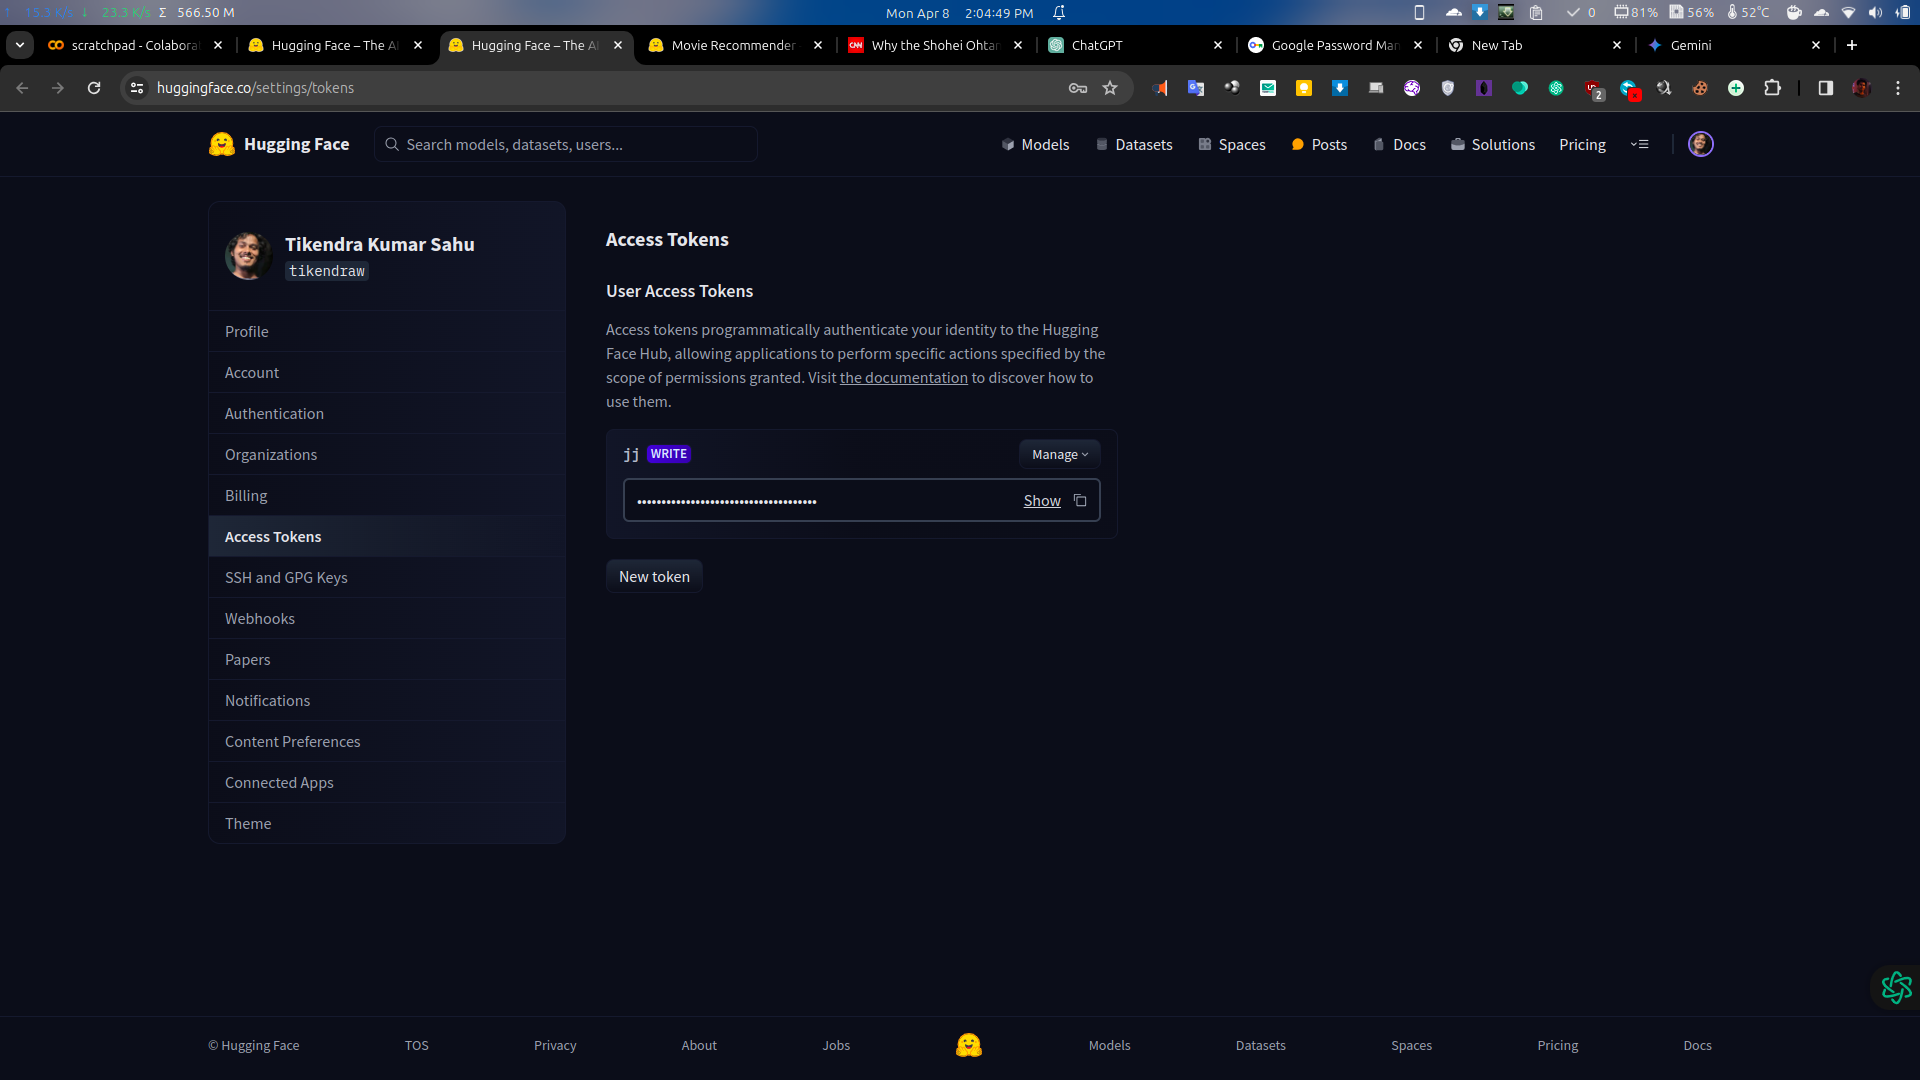

In [ ]:
# create a write token in huggingface from : https://huggingface.co/settings/tokens
# add token below
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' creden

In [ ]:
import os
!ls final_news/

ls: cannot access 'final_news/': No such file or directory


In [ ]:
!huggingface-cli repo create news-app

git version 2.34.1
git-lfs/3.0.2 (GitHub; linux amd64; go 1.18.1)

You are about to create tikendraw/news-app
Proceed? [Y/n] y

Your repo now lives at:
  https://huggingface.co/tikendraw/news-app

You can clone it locally with the command below, and commit/push as usual.

  git clone https://huggingface.co/tikendraw/news-app



In [ ]:
! cp -rf final_news/* news-app

In [ ]:
os.chdir("news-app")

In [ ]:
from huggingface_hub import HfApi

api = HfApi()
api.upload_folder(folder_path="./",  # Current working directory
                repo_id="tikendraw/news-app")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/tikendraw/news-app/commit/1706958d3667b8d6051cd0e27ad27882bd3924aa', commit_message='Upload folder using huggingface_hub', commit_description='', oid='1706958d3667b8d6051cd0e27ad27882bd3924aa', pr_url=None, pr_revision=None, pr_num=None)

In [7]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Replace with the actual name of your model repository on Hugging Face
model_name = "tikendraw/news-app"

model = AutoModelForSeq2SeqLM.from_pretrained(model_name)  # Load the model
tokenizer = AutoTokenizer.from_pretrained(model_name)  # Load the tokenizer

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.65k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/358 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

In [8]:
b = """
Elon Musk has long had an affinity for self-driving vehicles, claiming they will be one of Tesla’s most important products. Despite big promise﻿s, years have gone by without cars that can, so far, drive on their own.

But Musk, on a Friday afternoon, when companies tend to bury news, announced on X that Tesla would unveil its robotaxi on August 8.

His post was simple and included no details. “Tesla Robotaxi unveil on 8/8,” the Tesla CEO (and owner of X) posted.

Musk has said in the past that Tesla will make a car without controls for a human to use. He has also said in the past that Tesla cars equipped with Full Self-Driving Capability will, through software updates, gradually become better and better at driving. At some point, the cars will be capable of operating as fully autonomous taxis and could earn money for their owners by giving taxi rides on their own, Musk has repeatedly said.

So far, the company has passed several of Musk’s predictions for when actual self-driving would be possible.

Tesla five years ago, in April 2019, said it expected to begin operating robotaxis by 2020. The company predicted the autonomous cars would last 11 years and drive 1 million miles, making the company and the car’s operators $30,000 in profit each year.

But Musk also acknowledged that his track record for predictions can be off – sometimes by a mile.

“The only criticism and it’s a fair one, sometimes I’m not on time. But I get it done and the Tesla team gets it done,” Musk said at the April 2019 event.

Currently, Full Self-Driving capability can be purchased with a new Tesla Model 3, for instance, for an additional $12,000 added to the car’s roughly $40,000 purchase price. It can be also be purchased on a subscription basis for up to $199 a month, depending on how the car was originally equipped.

In small gray type, Tesla’s on-line description points out, “The currently enabled features require active driver supervision and do not make the vehicle autonomous,” meaning that it is not, in fact, capable of fully self-driving today.

Musk has said the system will one day make Tesla cars incredibly valuable.

“You can think of every car we sell or produce that has full autonomy capability as something that in the future may be worth five times what it is today,” he said in the company’s earnings call for the third quarter last year.

Experts who have tested the system say that, as of now, it is still far from being able to drive on its own without human intervention.

Kelly Funkhouser, associate director of vehicle technology for Consumer Reports, recently tested the system and said she’s less worried about its safety than she is about ordinary Tesla Autopilot, which is designed to provide more limited driving assistance mainly on highways. Ironically, that’s because the Full Self-Driving technology performs so poorly. Funkhouser described it as like giving control of your car to a novice teen driver.

“You’re not likely to tune out and become complacent or over-reliant on it,” she said. “In fact, I would say you’re potentially more alert.”

A number of companies, including Waymo, a subsidiary of Google’s parent company Alphabet, as well as GM subsidiary Cruise, are working on autonomous ride-sharing services.

Cruise has paused its testing work after one of its self-driving cars hit and dragged a pedestrian. An internal review found that company representatives had failed to be fully open with regulators about the incident. The company is being investigated by the Department of Justice over the incident.

Waymo recently had to recall its own cars after two of its cars hit the same tow truck within minutes of one another.
"""

In [9]:
b_tok = tokenizer(b, return_tensors='pt')

In [10]:
with torch.inference_mode():
    b_out = model.generate(**b_tok)

In [11]:
b_dec = tokenizer.decode(b_out[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)

In [12]:
b_dec

"Elon Musk announced on X that Tesla will unveil its robotaxi on August 8th. He has long had an affinity for self-driving vehicles. The company has passed several of Musk's predictions for when actual self driving cars will be possible. Tesla predicted in April 2019 that it expected to begin operating robotaxis by 2020."